In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
# Load the data file
file_path = '../data/patient_no_show_dataset_result.csv'
df = pd.read_csv(file_path)

In [13]:
label_encoder = LabelEncoder()
df_le = df
df_le['gender_encoding'] = label_encoder.fit_transform(df_le['gender'])
df_le['ethnicity_encoding'] = label_encoder.fit_transform(df_le['Ethnicity'])
df_le['status_encoding'] = label_encoder.fit_transform(df_le['Socioeconomic Status'])
df_le['noshow_encoding'] = label_encoder.fit_transform(df_le['Appointment No-show'])
df_le['prediction_encoding'] = label_encoder.fit_transform(df_le['prediction'])

df_le = df_le.drop(columns=["gender", "Ethnicity", "Socioeconomic Status", "Appointment No-show", "prediction"])
df = df_le

/tmp/ipykernel_36201/3897037273.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')


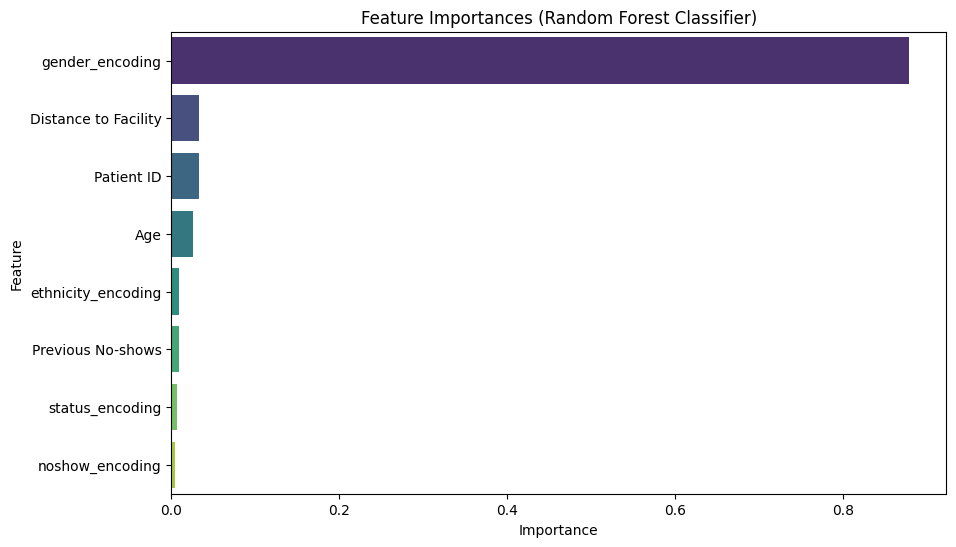

In [14]:
# Prepare data for feature importance analysis - [Extracting the target]
# Assuming the last column is the target variable and all others are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_
RandomForestClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()